In [2]:
import pandas as pd
df = pd.read_csv("../data/processed/health_checkup_processed.csv")

In [3]:
df.shape, df.columns

((662648, 29),
 Index(['성별코드', '연령대코드(5세단위)', '신장(5cm단위)', '체중(5kg단위)', '허리둘레', '청력(좌)',
        '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드',
        'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)',
        '혈청지피티(ALT)', '감마지티피', '흡연상태', '음주여부', 'bmi', 'alt_ast_ratio',
        'tg_hdl_ratio', 'ggtp_alt_ratio', 'ldl_hdl_ratio', 'pulse_pressure',
        'hypertension_status'],
       dtype='object'))

In [5]:
df['hypertension_status'].value_counts()

hypertension_status
0    555153
1    107495
Name: count, dtype: int64

| 값   | 의미    | 샘플 수    | 비율          |
| --- | ----- | ------- | ----------- |
| `0` | 정상 혈압 | 555,153 | 약 **83.8%** |
| `1` | 고혈압   | 107,495 | 약 **16.2%** |

| 관점         | 전략                                                                       |
| ---------- | ------------------------------------------------------------------------ |
| 분류 모델 선택 시 | `accuracy`만 보면 안 됨 → 고혈압(1)을 무시해도 정확도 높게 나옴                           |
| 평가 지표      | `precision`, `recall`, `F1-score`, **AUC-ROC** 등을 반드시 봐야 함               |
| 학습 데이터     | 언더샘플링/오버샘플링 고려 →  **SMOTE**, ADASYN, 또는 **XGBoost 내 class\_weight 조정** |

타겟 분포 확인 결과, 전체 데이터 중 약 16.2%가 고혈압 환자로 분류되며,  
이는 분류 모델 학습 시 클래스 불균형 문제를 고려해야 함을 시사 
정확도 외에도 정밀도(Precision), 재현율(Recall), AUC 등 다양한 평가지표와  
샘플링 전략 또는 가중치 보정이 함께 사용 필요

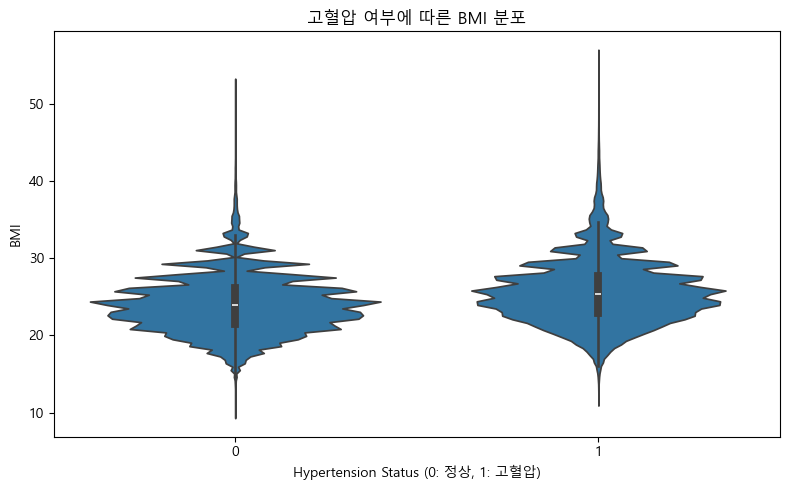

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Windows의 경우)
plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우: 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False      # 마이너스 기호 깨짐 방지

plt.figure(figsize=(8, 5))
sns.violinplot(x='hypertension_status', y='bmi', data=df, inner='box')
plt.title("고혈압 여부에 따른 BMI 분포")
plt.xlabel("Hypertension Status (0: 정상, 1: 고혈압)")
plt.ylabel("BMI")
plt.tight_layout()
plt.show()

Violinplot을 통해 BMI 분포를 시각화한 결과,  
고혈압자는 정상자에 비해 BMI의 전체 분포가 우측으로 이동해 있으며,  
과체중~비만(BMI 27~30) 구간에 밀도 집중이 뚜렷하게 나타난다.  
이는 BMI가 고혈압 발생과 밀접한 관련이 있음을 시사하며,  
고도비만(BMI > 35)에서의 꼬리 확장은 고위험군 특성으로 해석

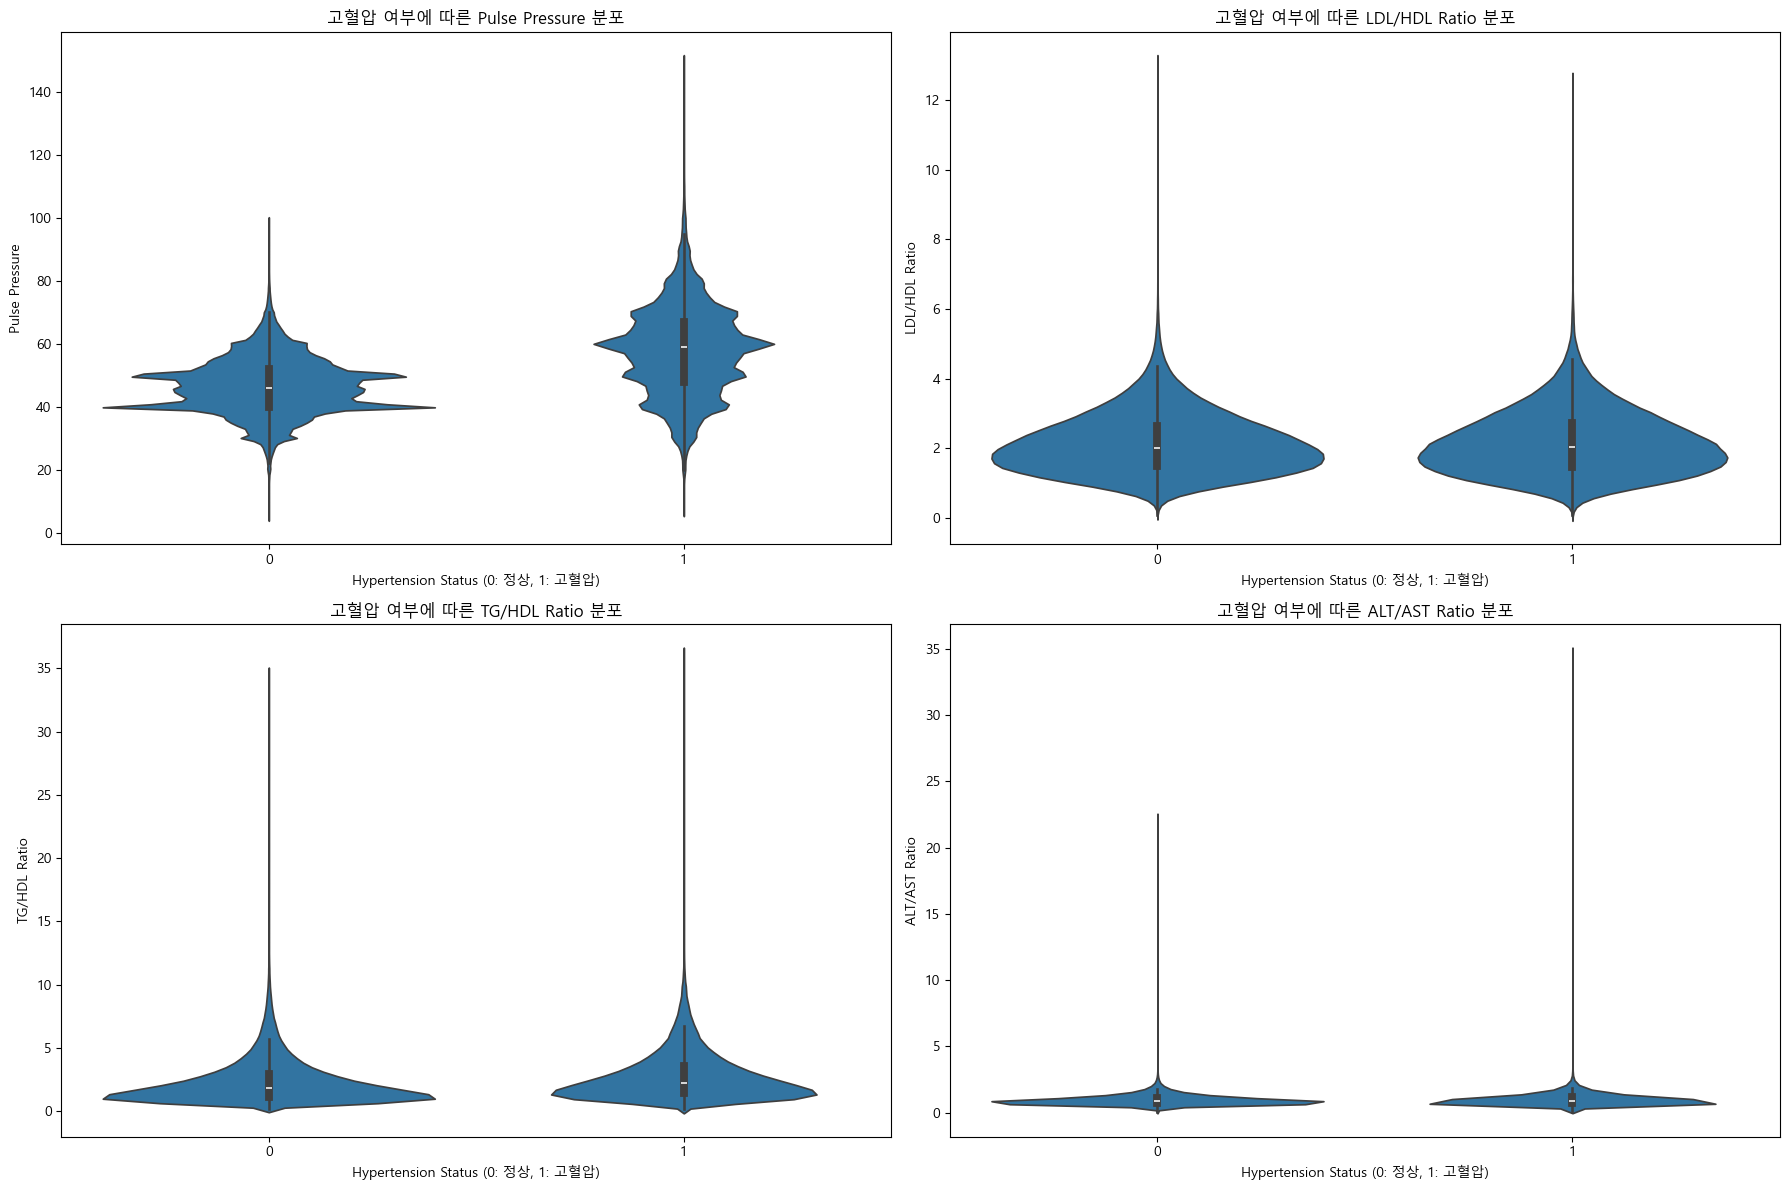

In [10]:
# 시각화할 변수 리스트
plot_features = ['pulse_pressure', 'ldl_hdl_ratio', 'tg_hdl_ratio', 'alt_ast_ratio']
titles = ['Pulse Pressure', 'LDL/HDL Ratio', 'TG/HDL Ratio', 'ALT/AST Ratio']

plt.figure(figsize=(18, 12))

for i, feature in enumerate(plot_features):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x='hypertension_status', y=feature, data=df, inner='box')
    plt.title(f"고혈압 여부에 따른 {titles[i]} 분포")
    plt.xlabel("Hypertension Status (0: 정상, 1: 고혈압)")
    plt.ylabel(titles[i])

plt.tight_layout()
plt.show()